In [64]:
import pandas as pd
from sklearn.model_selection import train_test_split
import missingno as msno

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

from sklearn.impute import SimpleImputer

In [2]:
data = pd.read_csv('melb_data (1).csv')

In [3]:
data.describe()

,Unnamed: 0,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,18396.000000,18396.000000,1.839600e+04,18395.000000,18395.000000,14927.000000,14925.000000,14820.000000,13603.000000,7762.000000,8958.000000,15064.000000,15064.000000,18395.000000
mean,11826.787073,2.935040,1.056697e+06,10.389986,3107.140147,2.913043,1.538492,1.615520,558.116371,151.220219,1965.879996,-37.809849,144.996338,7517.975265
std,6800.710448,0.958202,6.419217e+05,6.009050,95.000995,0.964641,0.689311,0.955916,3987.326586,519.188596,37.013261,0.081152,0.106375,4488.416599
min,1.000000,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,5936.750000,2.000000,6.330000e+05,6.300000,3046.000000,2.000000,1.000000,1.000000,176.500000,93.000000,1950.000000,-37.858100,144.931193,4294.000000
50%,11820.500000,3.000000,8.800000e+05,9.700000,3085.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.803625,145.000920,6567.000000
75%,17734.250000,3.000000,1.302000e+06,13.300000,3149.000000,3.000000,2.000000,2.000000,651.000000,174.000000,2000.000000,-37.756270,145.060000,10331.000000
max,23546.000000,12.000000,9.000000e+06,48.100000,3978.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18396 entries, 0 to 18395
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     18396 non-null  int64  
 1   Suburb         18396 non-null  object 
 2   Address        18396 non-null  object 
 3   Rooms          18396 non-null  int64  
 4   Type           18396 non-null  object 
 5   Price          18396 non-null  float64
 6   Method         18396 non-null  object 
 7   SellerG        18396 non-null  object 
 8   Date           18396 non-null  object 
 9   Distance       18395 non-null  float64
 10  Postcode       18395 non-null  float64
 11  Bedroom2       14927 non-null  float64
 12  Bathroom       14925 non-null  float64
 13  Car            14820 non-null  float64
 14  Landsize       13603 non-null  float64
 15  BuildingArea   7762 non-null   float64
 16  YearBuilt      8958 non-null   float64
 17  CouncilArea    12233 non-null  object 
 18  Lattit

In [6]:
data.isnull().sum()

Unnamed: 0           0
Suburb               0
Address              0
Rooms                0
Type                 0
Price                0
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          3469
Bathroom          3471
Car               3576
Landsize          4793
BuildingArea     10634
YearBuilt         9438
CouncilArea       6163
Lattitude         3332
Longtitude        3332
Regionname           1
Propertycount        1
dtype: int64

In [8]:
data_aux = data.drop(['Unnamed: 0'],axis=1)

In [11]:
X = data_aux.drop(['Price'],axis=1)


In [43]:
X

,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18391,Williamstown,8/2 Thompson St,2,t,SP,Greg,26/08/2017,6.8,3016.0,2.0,2.0,1.0,NaN,89.0,2010.0,NaN,-37.86393,144.90484,Western Metropolitan,6380.0
18392,Williamstown,96 Verdon St,4,h,PI,Sweeney,26/08/2017,6.8,3016.0,4.0,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0
18393,Yallambie,17 Amaroo Wy,4,h,S,Buckingham,26/08/2017,12.7,3085.0,4.0,3.0,2.0,NaN,NaN,NaN,NaN,-37.72006,145.10547,Northern Metropolitan,1369.0
18394,Yarraville,6 Agnes St,4,h,SP,Village,26/08/2017,6.3,3013.0,4.0,1.0,1.0,362.0,112.0,1920.0,NaN,-37.81188,144.88449,Western Metropolitan,6543.0


In [45]:
X = X.select_dtypes(exclude=['object'])

In [46]:
X

,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
0,2,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,-37.79960,144.99840,4019.0
1,2,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,-37.80790,144.99340,4019.0
2,3,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,-37.80930,144.99440,4019.0
3,3,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,-37.79690,144.99690,4019.0
4,4,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,-37.80720,144.99410,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...
18391,2,6.8,3016.0,2.0,2.0,1.0,NaN,89.0,2010.0,-37.86393,144.90484,6380.0
18392,4,6.8,3016.0,4.0,1.0,5.0,866.0,157.0,1920.0,-37.85908,144.89299,6380.0
18393,4,12.7,3085.0,4.0,3.0,2.0,NaN,NaN,NaN,-37.72006,145.10547,1369.0
18394,4,6.3,3013.0,4.0,1.0,1.0,362.0,112.0,1920.0,-37.81188,144.88449,6543.0


In [13]:
y = data_aux.Price

In [14]:
y

0        1480000.0
1        1035000.0
2        1465000.0
3         850000.0
4        1600000.0
           ...    
18391     622500.0
18392    2500000.0
18393    1100000.0
18394    1285000.0
18395    1050000.0
Name: Price, Length: 18396, dtype: float64

In [47]:
X_train,X_val,y_train,y_val=train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=0)

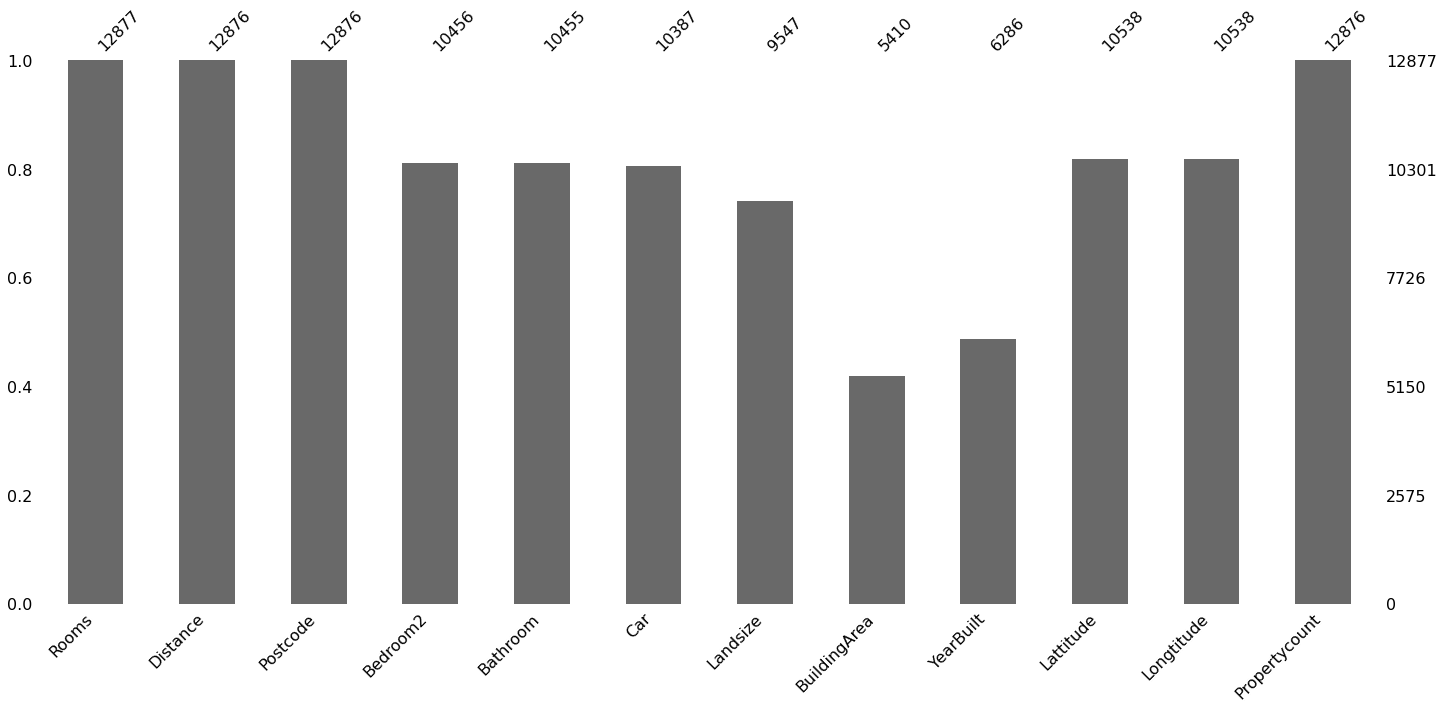

In [48]:
msno.bar(X_train)

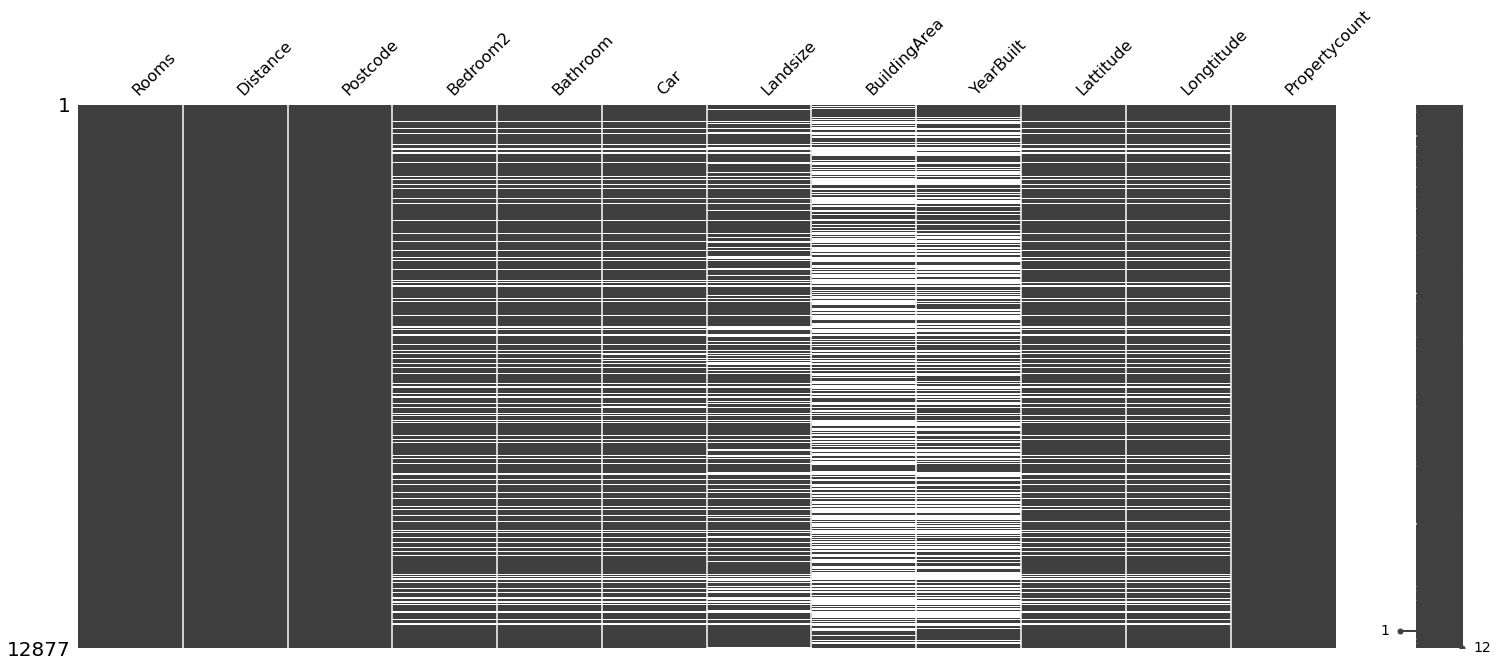

In [49]:
msno.matrix(X_train)

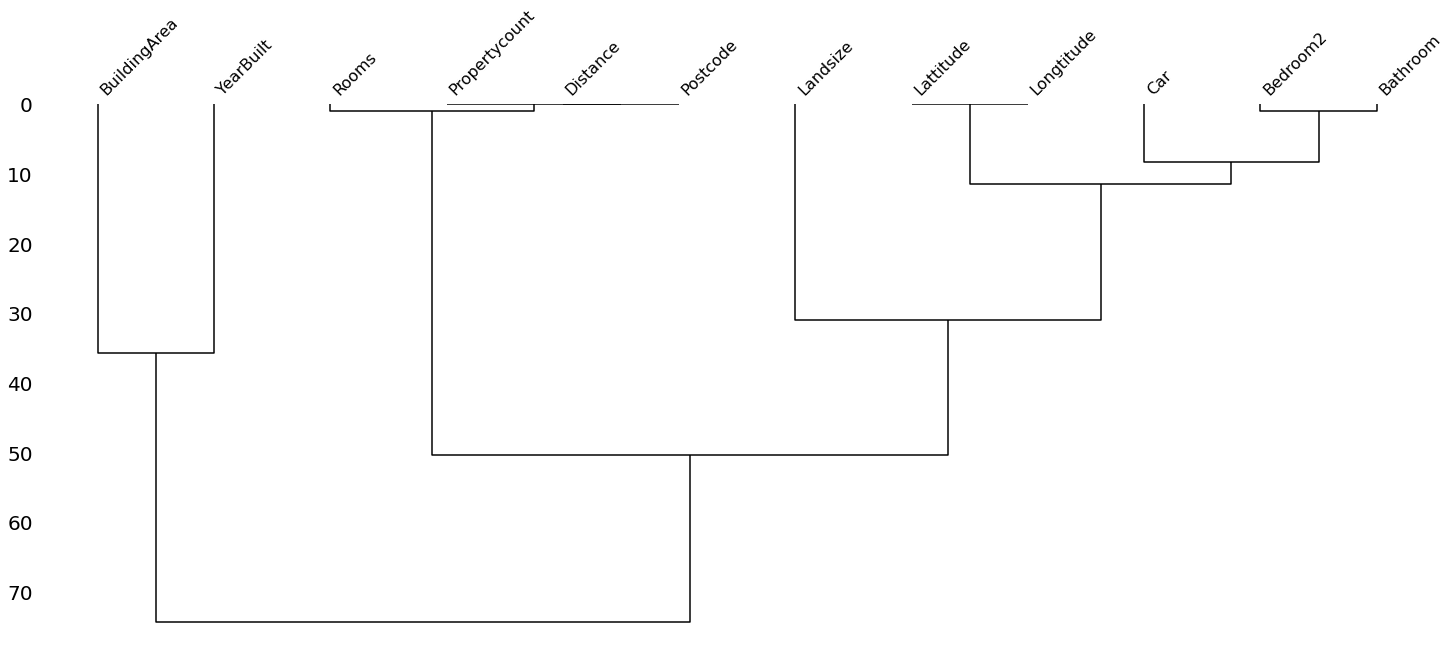

In [50]:
msno.dendrogram(X_train)

In [51]:
col_null = [col for col in X_train.columns if X_train[col].isnull().any()]

In [52]:
col_null

['Distance',
 'Postcode',
 'Bedroom2',
 'Bathroom',
 'Car',
 'Landsize',
 'BuildingArea',
 'YearBuilt',
 'Lattitude',
 'Longtitude',
 'Propertycount']

In [53]:
X_train_nuevo = X_train.drop(col_null,axis=1)

In [54]:
X_val_nuevo = X_val.drop(col_null,axis=1)

In [55]:
X_train_nuevo.isnull().sum()

Rooms    0
dtype: int64

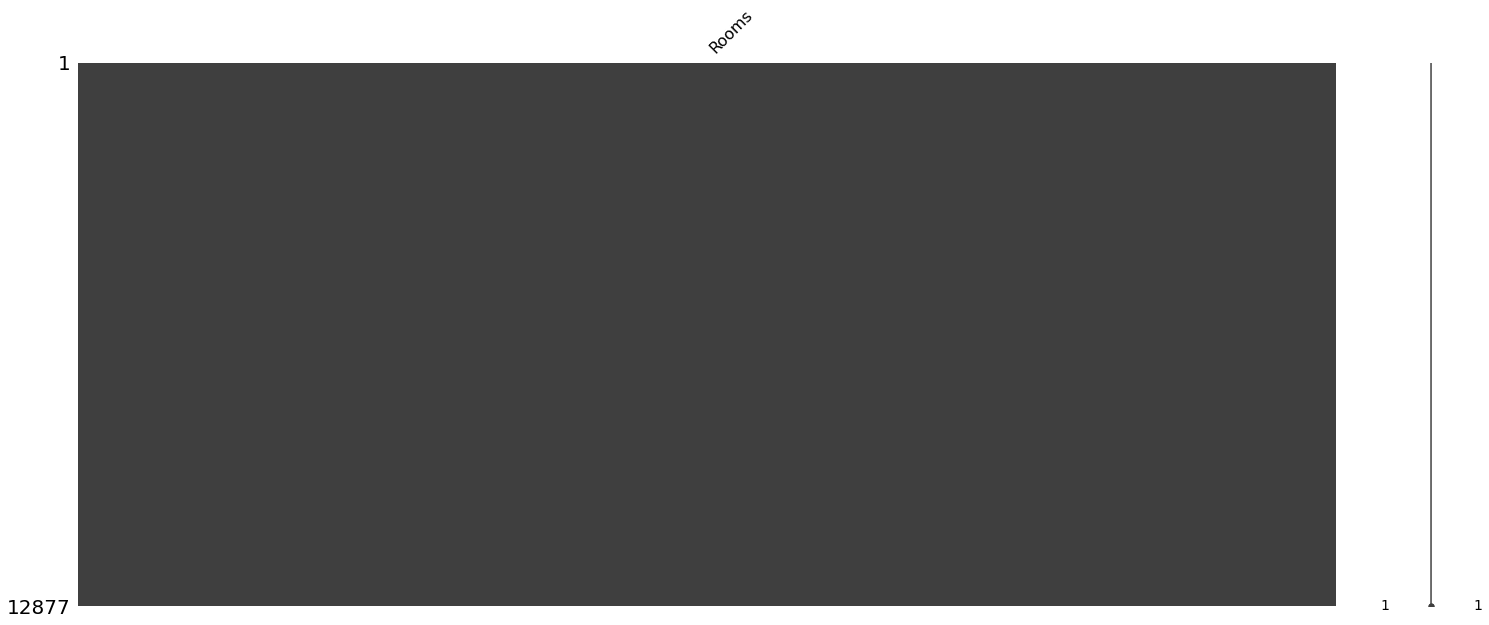

In [56]:
msno.matrix(X_train_nuevo)

In [57]:
X_val_nuevo.isnull().sum()

Rooms    0
dtype: int64

In [58]:
X_train_nuevo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12877 entries, 5043 to 2732
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Rooms   12877 non-null  int64
dtypes: int64(1)
memory usage: 201.2 KB


In [35]:
X_train_nuevo

,Suburb,Address,Rooms,Type,Method,SellerG,Date
5043,Maribyrnong,31 Forge Cl,3,t,SP,First,22/05/2016
1402,Brighton,17 New St,3,h,S,Marshall,6/08/2016
13712,MacLeod,5/105 Torbay St,2,u,S,Darren,8/07/2017
3368,Flemington,4 Farnham St,3,h,S,Nelson,27/11/2016
8805,Fawkner,1/66 Lorne St,3,u,SP,Brad,26/07/2016
...,...,...,...,...,...,...,...
9225,Albion,25 Brisbane St,2,u,S,Barry,24/09/2016
13123,Elwood,2/25 Kingsley St,2,u,S,Chisholm,27/05/2017
9845,Coburg,3 Beckwith St,3,h,S,Nelson,29/04/2017
10799,West Footscray,16 Hope St,3,h,PI,Burnham,20/05/2017


(12877, 13412)

(5519, 6061)

In [60]:
model = RandomForestRegressor(n_estimators=10,random_state=0)
model.fit(X_train_nuevo,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [61]:
y_pred = model.predict(X_val_nuevo)

In [62]:
error = mean_absolute_error(y_val,y_pred)

In [63]:
error

388203.59752749983

In [65]:
simple_imputer = SimpleImputer()
X_train_imputer = pd.DataFrame(simple_imputer.fit_transform(X_train))
X_val_imputer = pd.DataFrame(simple_imputer.fit_transform(X_val))

In [66]:
model = RandomForestRegressor(n_estimators=10,random_state=0)
model.fit(X_train_imputer,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [67]:
y_pred_imputer = model.predict(X_val_imputer)

In [68]:
print(mean_absolute_error(y_val,y_pred_imputer))

203132.5243219905


In [ ]:
import MICE